## README

## 本地数据

### 数据摘要

#### 2024年可用数据__20组数据
- 按照卡片分组
- 其他不可用的主要原因是数据缺失(最后检查卡片时上面没有SWD,断电,设备故障等原因)

<img src="figures/cell_002_image.png" width="600" alt="image.png"><br>



#### 最后用来训练的数据__7组数据__来自不同的卡片
- 总共可用数据是20组
- 选了其中7组作为训练数据
- 剩余13组数据,暂时没动,后续分析
- 7组数据
    - 训练采用Leave-One-Group-Out Cross-Validation
    - 将一组数据固定位测试集: held-out test set(v2_ms1_0726-0809_11)
- (7组数据+对应的null images)作为训练数据
    - 训练采用Leave-One-Group-Out Cross-Validation
    - 将一组数据固定位测试集: held-out test set(v2_ms1_0726-0809_11)


<img src="figures/cell_004_image.png" width="600" alt="image.png"><br>

### 本地数据Path: _ty/01_data
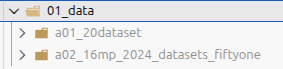

文件夹名                          | note                                                                         | fiftyone datasets                            | 相关数据处理代码
--------------------------------|------------------------------------------------------------------------------|-------------------------------------|-------------------------------------------------
a01_20dataset                   | 2024年__可用的20个数据__RawData__无annotation                                | N/A                                 | N/A
a02_16mp_2024_datasets_fiftyone | 2024年__20个数据中选出的7个数据__RawData + 640Data + null images__annotation | 原始数据集，精炼，4+3(详见README下面) | 01_PrepareTrainingData__fiftyone_to_trainingData

## 模型训练

### 训练结果__目前跑的所有模型结果
- 总共20个

<img src="figures/cell_005_image-2.png" width="600" alt="image-2.png"><br>

#### 第一版本运行__手动标记__Roboflow
- 数据：759张__含SWD__640子图

<img src="figures/cell_006_image.png" width="600" alt="image.png"><br>

#### 第二版本运行__扩大数据量__3&4dataset
<img src="figures/cell_007_image.png" width="600" alt="image.png"><br>

#### 分支__分类模型__第一版
<img src="figures/cell_008_image.png" width="600" alt="image.png"><br>

#### 分支__OBB模型__第一版
<img src="figures/cell_009_image.png" width="600" alt="image.png"><br>

#### 第三版本运行__扩大数据集_7datasets
<img src="figures/cell_010_image.png" width="600" alt="image.png"><br>


#### stage4__第四版本运行__加入null_images__7datasets
<img src="figures/cell_011_image.png" width="600" alt="image.png"><br>


##### 最好结果__output-swd_model_v4_7datasets_null_image_20pct_noAug_seed42

<img src="figures/cell_012_image.png" width="600" alt="image.png"><br>

- TOP3模型选择

<img src="figures/cell_012_image-2.png" width="600" alt="image-2.png"><br>

- 最终选择模型
    - yolo11n.pt_custom7null_cv1_ms2_0809-0823_10_ok_8



## 模型评估

### 测试集__模型评估

### 实际场景评估
- 在confidence处于[0.5,0.6,0.7,0.8,0.85,0.9,0.91,0.92,0.93]
- 选取F1分数最高的三个
    - 0.7

    <img src="figures/cell_012_image-3.png" width="600" alt="image-3.png"><br>
    - 0.8

    <img src="figures/cell_012_image-4.png" width="600" alt="image-4.png"><br>
    - 0.85

    <img src="figures/cell_012_image-5.png" width="600" alt="image-5.png"><br>

- 思考：
    - 实际场景中检测效果下降。
    - 需要进入实际场景中查看原因

- 实际场景图片：
    - GT

    <img src="figures/cell_012_image-6.png" width="600" alt="image-6.png"><br>
    - Predict

    <img src="figures/cell_012_image-7.png" width="600" alt="image-7.png"><br>

- 思考：
    - GT问题 -- 人工标注还是有问题，尽管已经经过了4次的精炼，人工识别任然有疏漏。而模型实际表现非常好。

    <img src="figures/cell_012_image-8.png" width="600" alt="image-8.png"><br>

- TODO
    - 应用模型，预测一组数据（v2_ms1_0726-0809_11）的SWD数量。
    - 通过fiftyone查看每张图片的GT是否对应上预测，如果是GT错误则纠正GT值。


## fiftyone datasets

```python
my-dataset                      
# 原始数据集，精炼，4+3
v1_ms1_0710-0726_36_ok          
v1_ms1_0809-0823_34_ok          
v1_ms2_0726-0809_13_ok          
v1_sw1_0605-0613_07_ok          
v2_ms1_0605-0621_40_ok          
v2_ms1_0726-0809_11_ok          
v2_ms2_0809-0823_10_ok          
# 应用__四个数据组训练出的模型
v3_sahi_ms1_0605-0621_40_ok     
v3_sahi_ms1_0710-0726_36_ok     
v3_sahi_ms1_0726-0809_11_ok     
v3_sahi_ms1_0809-0823_34_ok     
v3_sahi_ms2_0726-0809_13_ok     
v3_sahi_ms2_0809-0823_10_ok     
v3_sahi_sw1_0605-0613_07_ok     
# 应用__七个数据组训练出的模型
sahi_v1_ms1_0605-0621_40_ok     
sahi_v1_ms1_0710-0726_36_ok     
sahi_v1_ms1_0726-0809_11_ok     
sahi_v1_ms1_0809-0823_34_ok     
sahi_v1_ms2_0726-0809_13_ok     
sahi_v1_ms2_0809-0823_10_ok     
sahi_v1_sw1_0605-0613_07_ok     
# 应用__七个数据组+null images训练出的模型
sahi_null_v2_ms1_0605-0621_40_ok
sahi_null_v2_ms1_0710-0726_36_ok
sahi_null_v2_ms1_0726-0809_11_ok
sahi_null_v2_ms1_0809-0823_34_ok
sahi_null_v2_ms2_0726-0809_13_ok
sahi_null_v2_ms2_0809-0823_10_ok
sahi_null_v2_sw1_0605-0613_07_ok
```

| Model Name                                                        | Project                                                      | mAP50–95 (B) | PR Curve | F1 (B) |                           note |
|-------------------------------------------------------------------|--------------------------------------------------------------|-------------:|---------:|-------:|-------------------------------:|
| a01_model_v2_4datasets_noAug_seed0_yolo11s_data_split_custom_8.pt | output-swd_model_v2_4datasets_noAug_seed0                    |        **1** |          |        |             四个数据组训练出的模型 |
| a02_yolo11s_custom7_v2-13_7_34_36-40_10-11_8.pt                   | output-swd_model_v3_7datasets_seed42                         |        **1** |          |        |             七个数据组训练出的模型 |
| a02_yolo11s_custom7_v2-13_7_34_36-40_10-11_4.pt                   | output-swd_model_v3_7datasets_seed42                         |        **2** |          |        |             七个数据组训练出的模型 |
| a02_yolo11s_custom7_v1-34_36_40_11_-13-10_16.pt                   | output-swd_model_v3_7datasets_seed42                         |        **3** |          |        |             七个数据组训练出的模型 |
| a02_yolo11s_custom7_v4-36_40_10_11-7_34-13_16.pt                  | output-swd_model_v3_7datasets_seed42                         |              |    **1** |        |             七个数据组训练出的模型 |
| a02_yolo11s_custom7_v4-36_40_10_11-7_34-13_8.pt                   | output-swd_model_v3_7datasets_seed42                         |              |          |  **1** |             七个数据组训练出的模型 |
| a03_yolo11s_custom7null_cv1_ms2_0809-0823_10_ok_16.pt             | output-swd_model_v4_7datasets_null_image_100pct_noAug_seed42 |        **1** |          |        | 七个数据组+null images训练出的模型 |
| a03_yolo11n_custom7null_cv1_ms2_0809-0823_10_ok_8.pt              | output-swd_model_v4_7datasets_null_image_100pct_noAug_seed42 |        **2** |          |  **1** | 七个数据组+null images训练出的模型 |
| a03_yolo11s_custom7null_cv1_ms2_0809-0823_10_ok_8.pt              | output-swd_model_v4_7datasets_null_image_100pct_noAug_seed42 |        **3** |    **1** |        | 七个数据组+null images训练出的模型 |
| a03_yolo11s_custom7null_cv1_ms2_0809-0823_10_ok_4.pt              | output-swd_model_v4_7datasets_null_image_100pct_noAug_seed42 |        **4** |          |        | 七个数据组+null images训练出的模型 |
| a04_yolo11s_custom7null_cv1_ms2_0809-0823_10_ok_16.pt             | output-swd_model_v4_7datasets_null_image_20pct_noAug_seed42  |        **1** |          |        | 七个数据组+null images训练出的模型 |
| a04_yolo11n_custom7null_cv1_ms2_0809-0823_10_ok_4.pt              | output-swd_model_v4_7datasets_null_image_20pct_noAug_seed42  |        **2** |          |        | 七个数据组+null images训练出的模型 |
| a04_yolo11n_custom7null_cv1_ms2_0809-0823_10_ok_8.pt              | output-swd_model_v4_7datasets_null_image_20pct_noAug_seed42  |        **3** |          |  **1** | 七个数据组+null images训练出的模型 |
| a04_yolo11s_custom7null_cv1_ms2_0809-0823_10_ok_8.pt              | output-swd_model_v4_7datasets_null_image_20pct_noAug_seed42  |              |    **1** |        | 七个数据组+null images训练出的模型 |



### 图例
- # 原始数据集，精炼，4+3

<img src="figures/cell_015_image-2.png" width="600" alt="image-2.png"><br>


- # 应用__四个数据组训练出的模型

<img src="figures/cell_015_image.png" width="600" alt="image.png"><br>

- 应用__七个数据组训练出的模型

<img src="figures/cell_015_image-3.png" width="600" alt="image-3.png"><br>

- 应用__七个数据组+null images训练出的模型

<img src="figures/cell_015_image-4.png" width="600" alt="image-4.png"><br>

## archive 文件